In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd


In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

In [13]:
max_date = max_date[0]

In [15]:
year_p = dt.datetime.strptime(max_date, "%Y-%m-%d") - dt.timedelta(days=366)

In [23]:
Query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_p).all()

In [24]:
precip_df = pd.DataFrame(Query,columns=['date', 'precipitation'])

In [26]:
precip_df['date'] = pd.to_datetime(precip_df['date'], format = "%Y-%m-%d")

In [28]:
precip_df.set_index("date", inplace=True)

In [29]:
precip_df = precip_df.sort_values(by= "date", ascending=True)

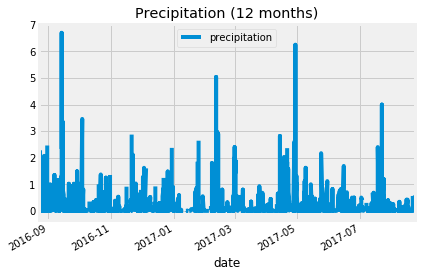

In [30]:
precip_df . plot(title= "Precipitation (12 months)")
plt.legend(loc="upper center")
plt.savefig("Images/Precipitation.png")
plt.show()

In [31]:
precip_df.describe

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [33]:
avail_stations = session.query(Measurement.station).distinct().count()
print(f"Stations Available: {avail_stations}")

Stations Available: 9


In [35]:
act_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

In [36]:
print (f"Most Active Sations")
act_stations

Most Active Sations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
most_act_station = act_stations[0][0]
print (f"Most Active Station: {most_act_station}")

Most Active Station: USC00519281


In [39]:
most_act_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                              func.avg(Measurement.tobs)).filter(Measurement.station == most_act_station).all()
print(f"Most Active Station Temp")
print(f"low: {most_act_temps[0][0]} High: {most_act_temps[0][1]} Average: {round(most_act_temps[0][2], 1)}")

Most Active Station Temp
low: 54.0 High: 85.0 Average: 71.7


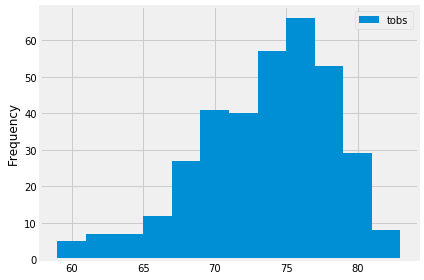

In [42]:
import datetime as dt
from pandas.plotting import table
year_p = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= year_p).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

In [43]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [44]:
trip =  calc_temps("2017-07-01", "2017-07-14")
trip

[(69.0, 78.11627906976744, 87.0)]

In [46]:
trip_df = pd.DataFrame(trip, columns=["tmin", "tavg", "tmax"])

In [51]:
trip_df.plot.bar(y='tavg', yerr=(trip_df['tmax'] - trip_df['tmin']), title = "Trip Avg Temp", color="red", alpha=0.5 figsize=(4,6))
plt.xticks(np.arange(1, 1.0))
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.savefig("Images/TripAvgTemp.png")
plt.show()

SyntaxError: invalid syntax (<ipython-input-51-d2447fceb206>, line 1)